# Visualização de dados com matplotlib

Aqui neste notebook vou registrar porções de código para construir visualizações dos dados das ações do Facebook e da Microsoft utilizando a biblioteca pandas para manipular os dados e matplotlib para visualizar.

## Carregar bibliotecas

In [1]:
# importar pandas
import pandas as pd

# importar matplotlib
import matplotlib.pyplot as plt
from pylab import *

# importar numpy
import numpy as np

## Importar os dados

In [6]:
# importar os dados
fb = pd.read_csv('../data/facebook.csv', parse_dates = ['Date'], index_col = ['Date'])
ms = pd.read_csv('../data/microsoft.csv', parse_dates = ['Date'], index_col = ['Date'])

## Visualizar os dados

A visualização dos dados também é simples. Os objetos do tipo data frame têm uma função para plotar os seus dados, sem depender de nenhuma outra biblioteca.

A referência da função tem mais detalhes sobre o uso, aqui darei apenas alguns simples exeplos.

Por exemplo, para ver a série temporal do preço "Close".

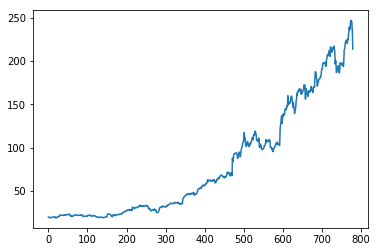

In [3]:
fb['Close'].plot();

In [ ]:
fb.loc[:, 'Close'].plot();

Todos os dados estão aí. Se eu quiser alguns períodos particulares também é muito fácil. Por exemplo, se eu quiser destacar a variação do primeiro semestre de 2017:

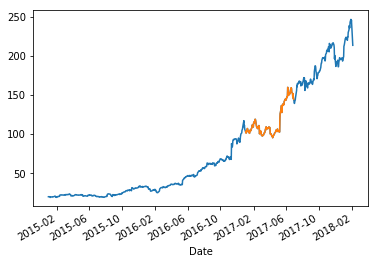

In [7]:
fb['Close'].plot()
fb.loc['2017-01-01':'2017-06-30', 'Close'].plot();

Digamos que eu queira comparar as variações do Facebook e da Microsoft:

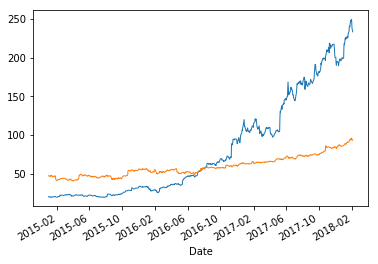

In [21]:
# Criar o gráfico
fb['High'].plot(linewidth = 1)
ms['High'].plot(linewidth = 1);

E se eu quiser plotar separadamente:

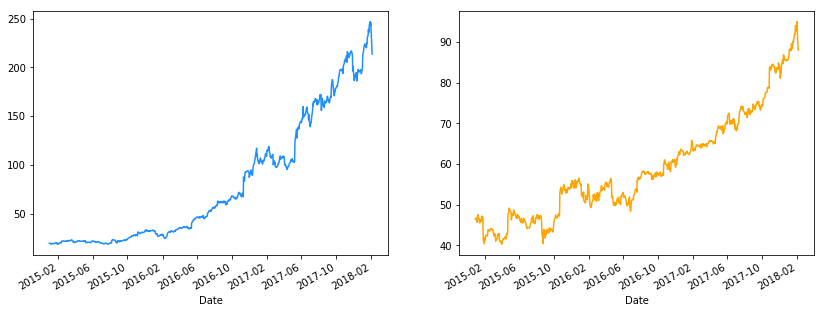

In [23]:
# Criar o gráfico
plt.figure(figsize = (14,5))
subplot(1,2,1)
fb['Close'].plot(color = "dodgerblue")
subplot(1,2,2)
ms['Close'].plot(color = "orange")

Caso eu queira outros formatos basta adicionar a `.plot.TipoDePlot()`. Para visualizar a distribuição na forma de histogram, por exemplo:

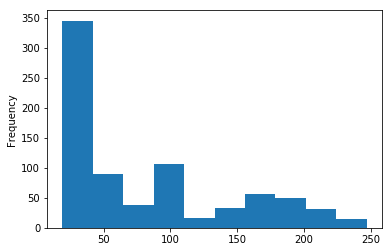

In [24]:
fb.loc[:, 'Close'].plot.hist();

Ou como um boxplot.

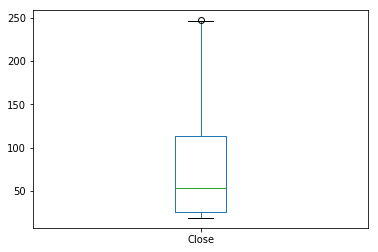

In [26]:
fb.loc[:, 'Close'].plot.box();

E seu eu quiser comparar distribuições com boxplot.

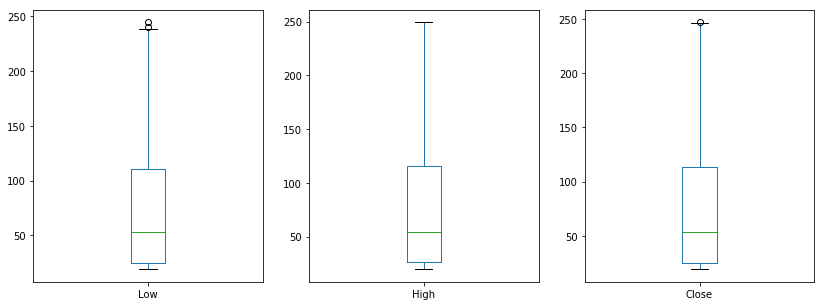

In [29]:
plt.figure(figsize = (14,5))
subplot(1,3,1)
fb['Low'].plot.box()
subplot(1,3,2)
fb['High'].plot.box()
subplot(1,3,3)
fb['Close'].plot.box();

Se ao invés de um histogram eu quiser um boxplots, também é simples. A diferença, abaixo, é que criarei um subplot para plot os gráfico de três variáveis lado a lado.

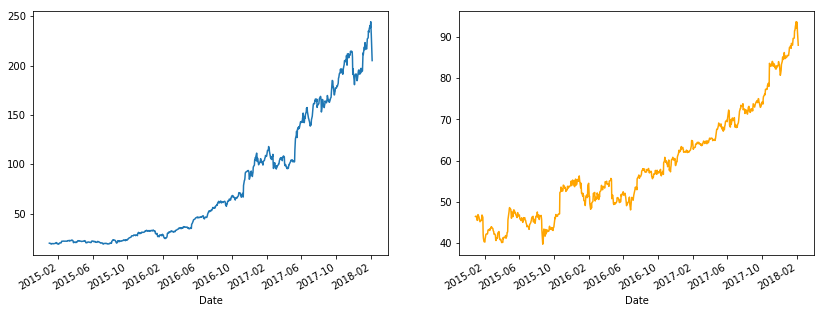

In [69]:
plt.figure(figsize = (14,5))
subplot(1,2,1)
fb['Low'].plot()
subplot(1,2,2)
ms['Low'].plot(color = "orange");

Para plotar junto, no mesmo gráfico, o procedimento é um pouco diferente.

<Figure size 1008x360 with 0 Axes>

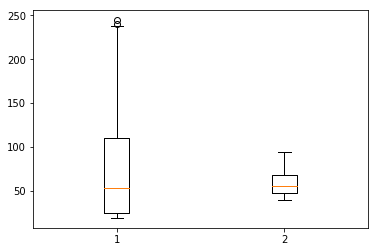

In [70]:
data_plot = [fb['Low'], ms['Low']]

plt.figure(figsize = (14,5))
f, (ax) = plt.subplots()
ax.boxplot(data_plot);

Também podemos plotar um scatterplot. Por exemplo, para comparar a correlação do volume de transações de ações do Facebook e da Microsoft.

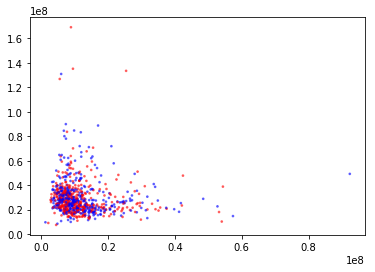

In [133]:
x = fb['Volume']
y = ms['Volume']
colors = ['blue', 'red']
plt.scatter(x, y, alpha = 0.5, c = colors, s = 3);

Podemos usar um gráfico de barras para verificar, por exemplo, quantos dias o colume de transações de ações do Facebook for maior que o volume de transações das ações da Microsoft.

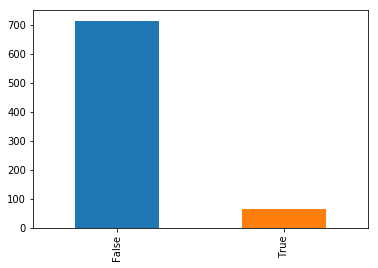

In [136]:
x = fb['Volume'] > ms['Volume']
counts = x.value_counts()
counts.plot('bar');